In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import networkx as nx
import math
import ast
from tools import analysistools as atools

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
(188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

tab20 = [tuple([float(c)/255.0 for c in t]) for t in tableau20]

In [34]:
df = pd.read_csv('/Users/joel/Desktop/Resubmission/longlots/lotsorots_long.csv')
df = df.drop_duplicates(subset=['genome'])

In [61]:
df[df['fitness']==df[df['generation']==7]['fitness'].min()]['density']

1285    0.147186
Name: density, dtype: float64

In [59]:
np.mean(df['density'])

0.14682705926945558

In [35]:
gadf = pd.read_csv('/Users/joel/Desktop/Resubmission/eps11n22-0.3.csv')

In [36]:
OldDen = gadf.drop_duplicates(subset=['Mean Budding Time'])[(gadf['Budding Rate']>0.0)]['Density']

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [37]:
OldFailed = gadf.drop_duplicates(subset=['Fitness'])[(gadf['Budding Rate']==0.0)]['Density']

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [38]:
def buildNetworksFromSummaries(df):
    graphs = []
    for index, row in df.iterrows():
        ldata = ast.literal_eval(row['ligand data'])
        G=nx.Graph()
        for i,l in enumerate(ldata):
            G.add_node(i,weight=l[0],polAng=l[3],aziAng=l[4])
        for j,m in enumerate(ldata):
            for k,n in enumerate(ldata):
                if m==n:
                    continue
                w = 1.0/atools.greatArcDist(m[3:],n[3:])
                G.add_edge(j, k, weight=w)
        G = atools.pruneNetwork(G,0.3)
        graphs.append(G)
    df['graph']=graphs
    df['density'] = df['graph'].apply(nx.density)
    df['subgraphs'] = df['graph'].apply(nx.number_connected_components)
    return df

In [39]:
len(fastdf), len(slowdf)

NameError: name 'fastdf' is not defined

In [43]:
graphs = []
for index, row in df.iterrows():
    ldata = ast.literal_eval(row['ligand data'])
    G=nx.Graph()
    for i,l in enumerate(ldata):
        G.add_node(i,weight=l[0],polAng=l[3],aziAng=l[4])
    for j,m in enumerate(ldata):
        for k,n in enumerate(ldata):
            if m==n:
                continue
            w = 1.0/atools.greatArcDist(m[3:],n[3:])
            G.add_edge(j, k, weight=w)
    G = atools.pruneNetwork(G,0.3)
    graphs.append(G)
df['graph']=graphs

In [44]:
df['density'] = df['graph'].apply(nx.density)
df['subgraphs'] = df['graph'].apply(nx.number_connected_components)

In [66]:
fdf = df[(df['budding time']<25000) & (df['budding time']>0)]
sdf = df[(df['budding time']>25000) & (df['budding time']>0)]
ndf = df[(df['budding time']<0)]
bdf = df[(df['budding time']>0)]
df25 = df[(df['budding rate']<=0.25) & (df['budding rate']>0.0)]
df50 = df[(df['budding rate']<=0.5) & (df['budding rate']>0.25)]
df75 = df[(df['budding rate']<=0.75) & (df['budding rate']>0.5)]
dfu100 = df[(df['budding rate']<=0.5) & (df['budding rate']>0.0)]
df100 = df[(df['budding rate']<=1.0) & (df['budding rate']>0.5)]

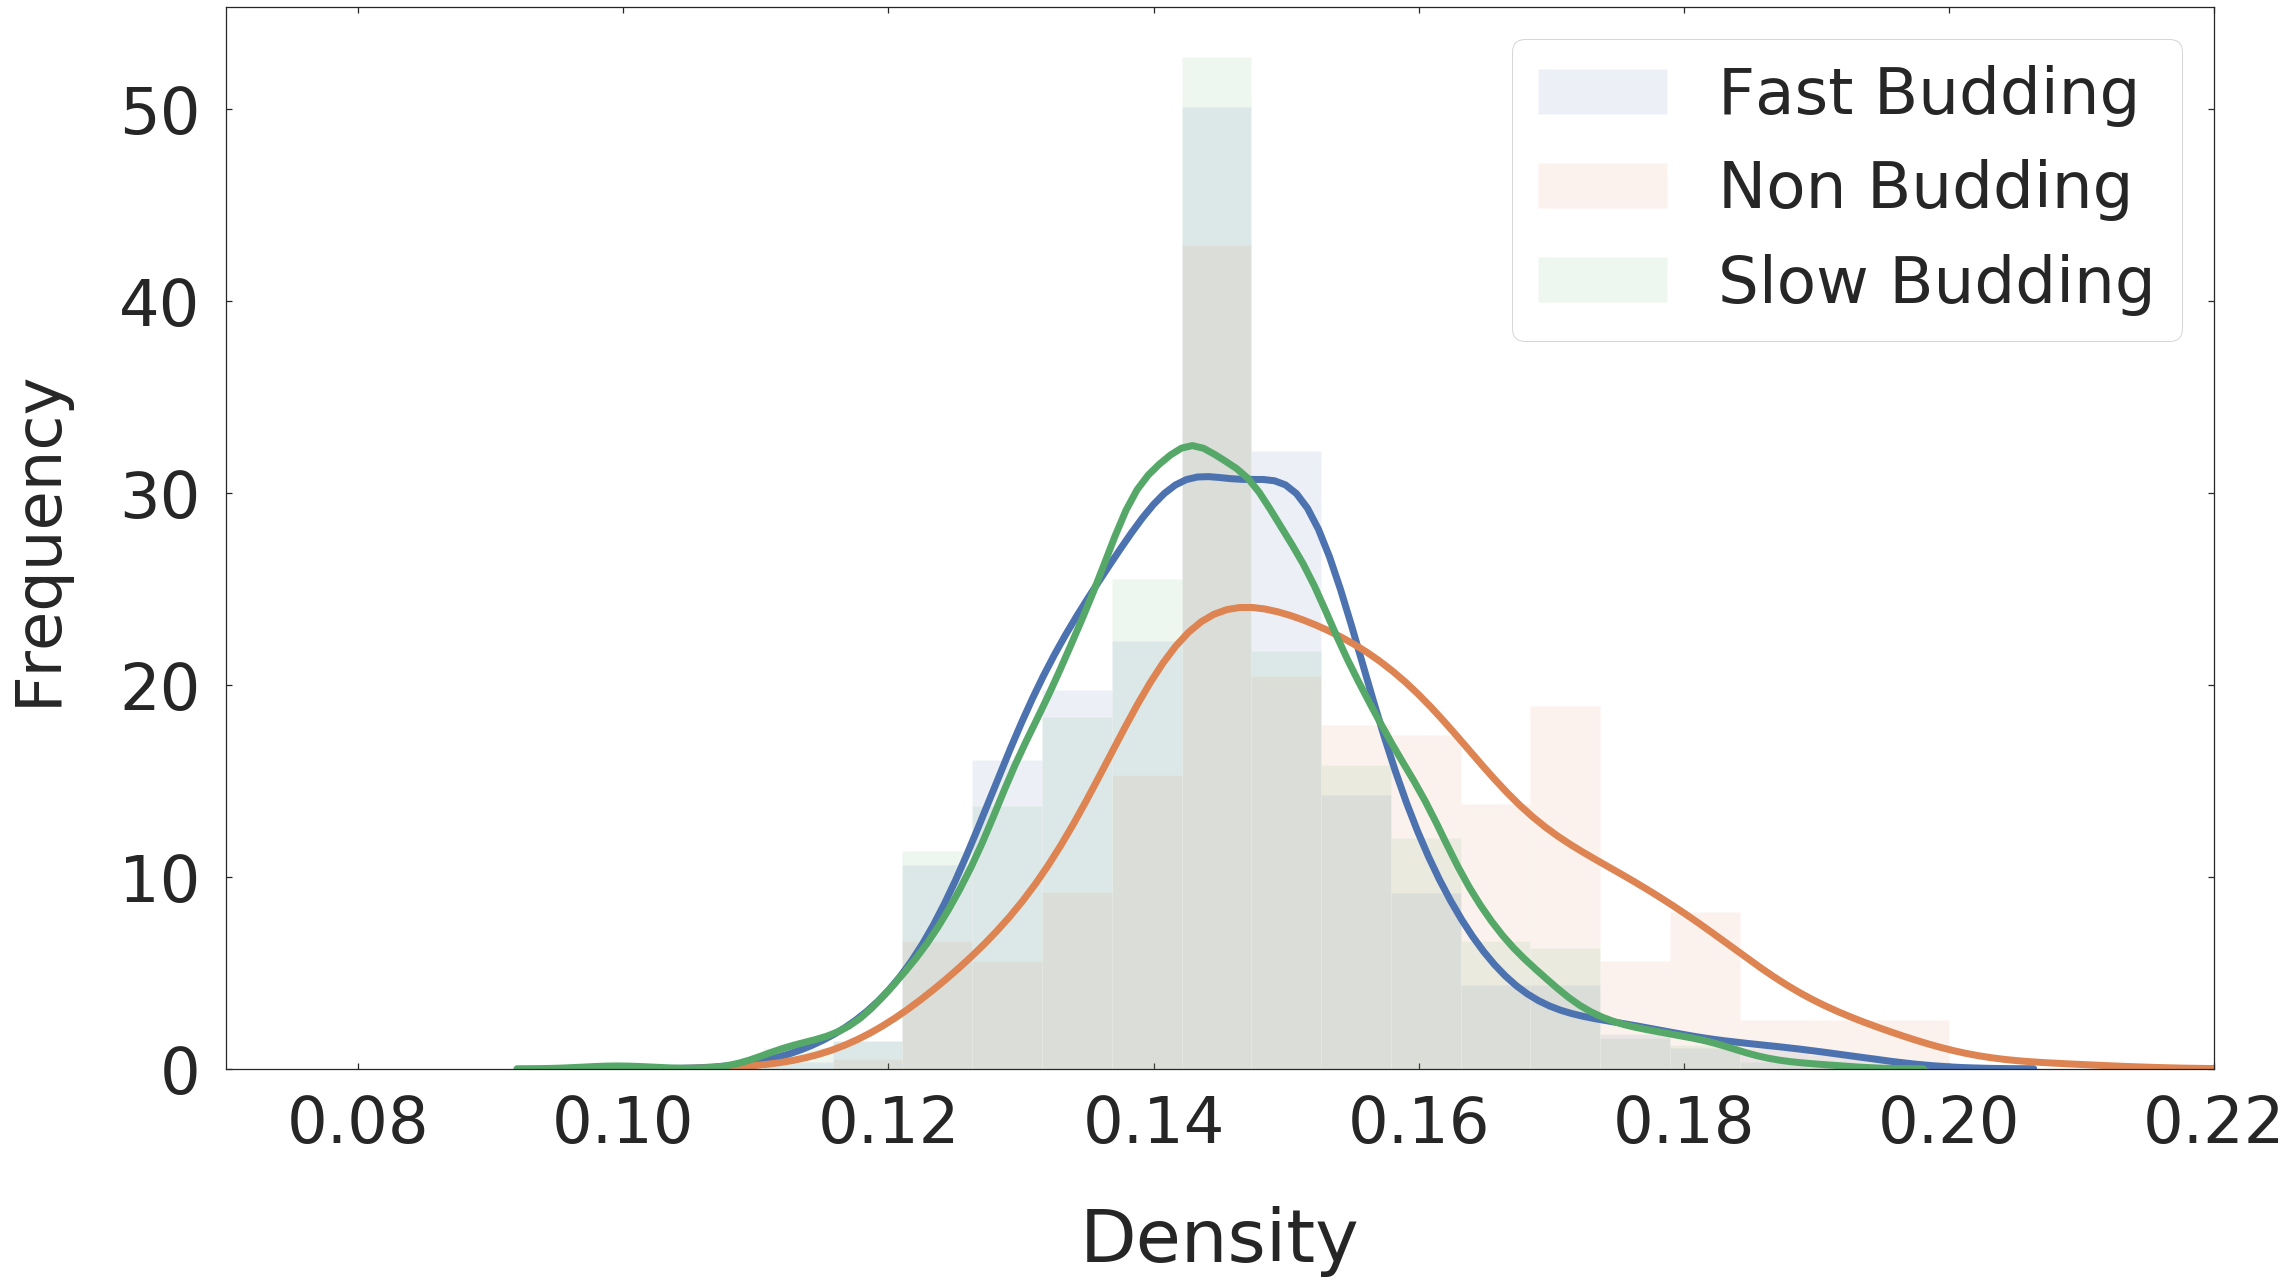

In [46]:
plt.figure(figsize=(16*2.0,9*2.0))

sns.set(rc={"lines.linewidth": 7.0,'text.usetex':False, 'font.family':'sans-serif', 'font.sans-serif':'Helvetica'}, font='DejaVu Sans',style='white')


factor=2.0
padding=0.025

labelSize=32
tickSize=32

ax = plt.subplot(111)

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

lw=6.0

plt.xticks(fontsize=tickSize*factor)
plt.yticks(fontsize=tickSize*factor)
ax.spines["top"].set_visible(True)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(True)    
ax.spines["left"].set_visible(True) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   
    
#     ax.set_yl

plt.tick_params(axis="both", which="both", bottom="on", top="on",    
                    labelbottom="on", left="on", right="on", labelleft="on",direction='in')  

plt.gca().tick_params(axis='x', which='major', pad=25)
plt.gca().tick_params(axis='y', which='major', pad=25)



bins = np.linspace(0.1, 0.2, 20)

sns.distplot(fdf['density'],hist=True,label='Fast Budding',norm_hist=True,kde=True,bins=bins,hist_kws={"alpha":0.1})
sns.distplot(ndf['density'],hist=True,label='Non Budding',norm_hist=True,kde=True,bins=bins,hist_kws={"alpha":0.1})
sns.distplot(sdf['density'],hist=True,label='Slow Budding',norm_hist=True,kde=True,bins=bins,hist_kws={"alpha":0.1})
plt.ylabel("Frequency",fontsize=labelSize*factor,labelpad=25*factor)
plt.xlabel("Density",fontsize=labelSize*factor*1.15,labelpad=25*factor)

plt.xlim((0.07, 0.22)) 

plt.legend(loc='best',fontsize=labelSize*1.75*1.15)
plt.tight_layout()

plt.savefig('/Users/joel/Projects/optidb/resubmission/Figures/eps/density-longrun.eps', format='eps', dpi=1000)
plt.savefig('/Users/joel/Projects/optidb/resubmission/Figures/png/density-longrun.png')
plt.savefig('/Users/joel/Projects/optidb/resubmission/Figures/pdf/density-longrun.pdf', format='pdf')
plt.savefig('/Users/joel/Projects/optidb/resubmission/Figures/svg/density-longrun.pdf', format='svg')           


plt.show()



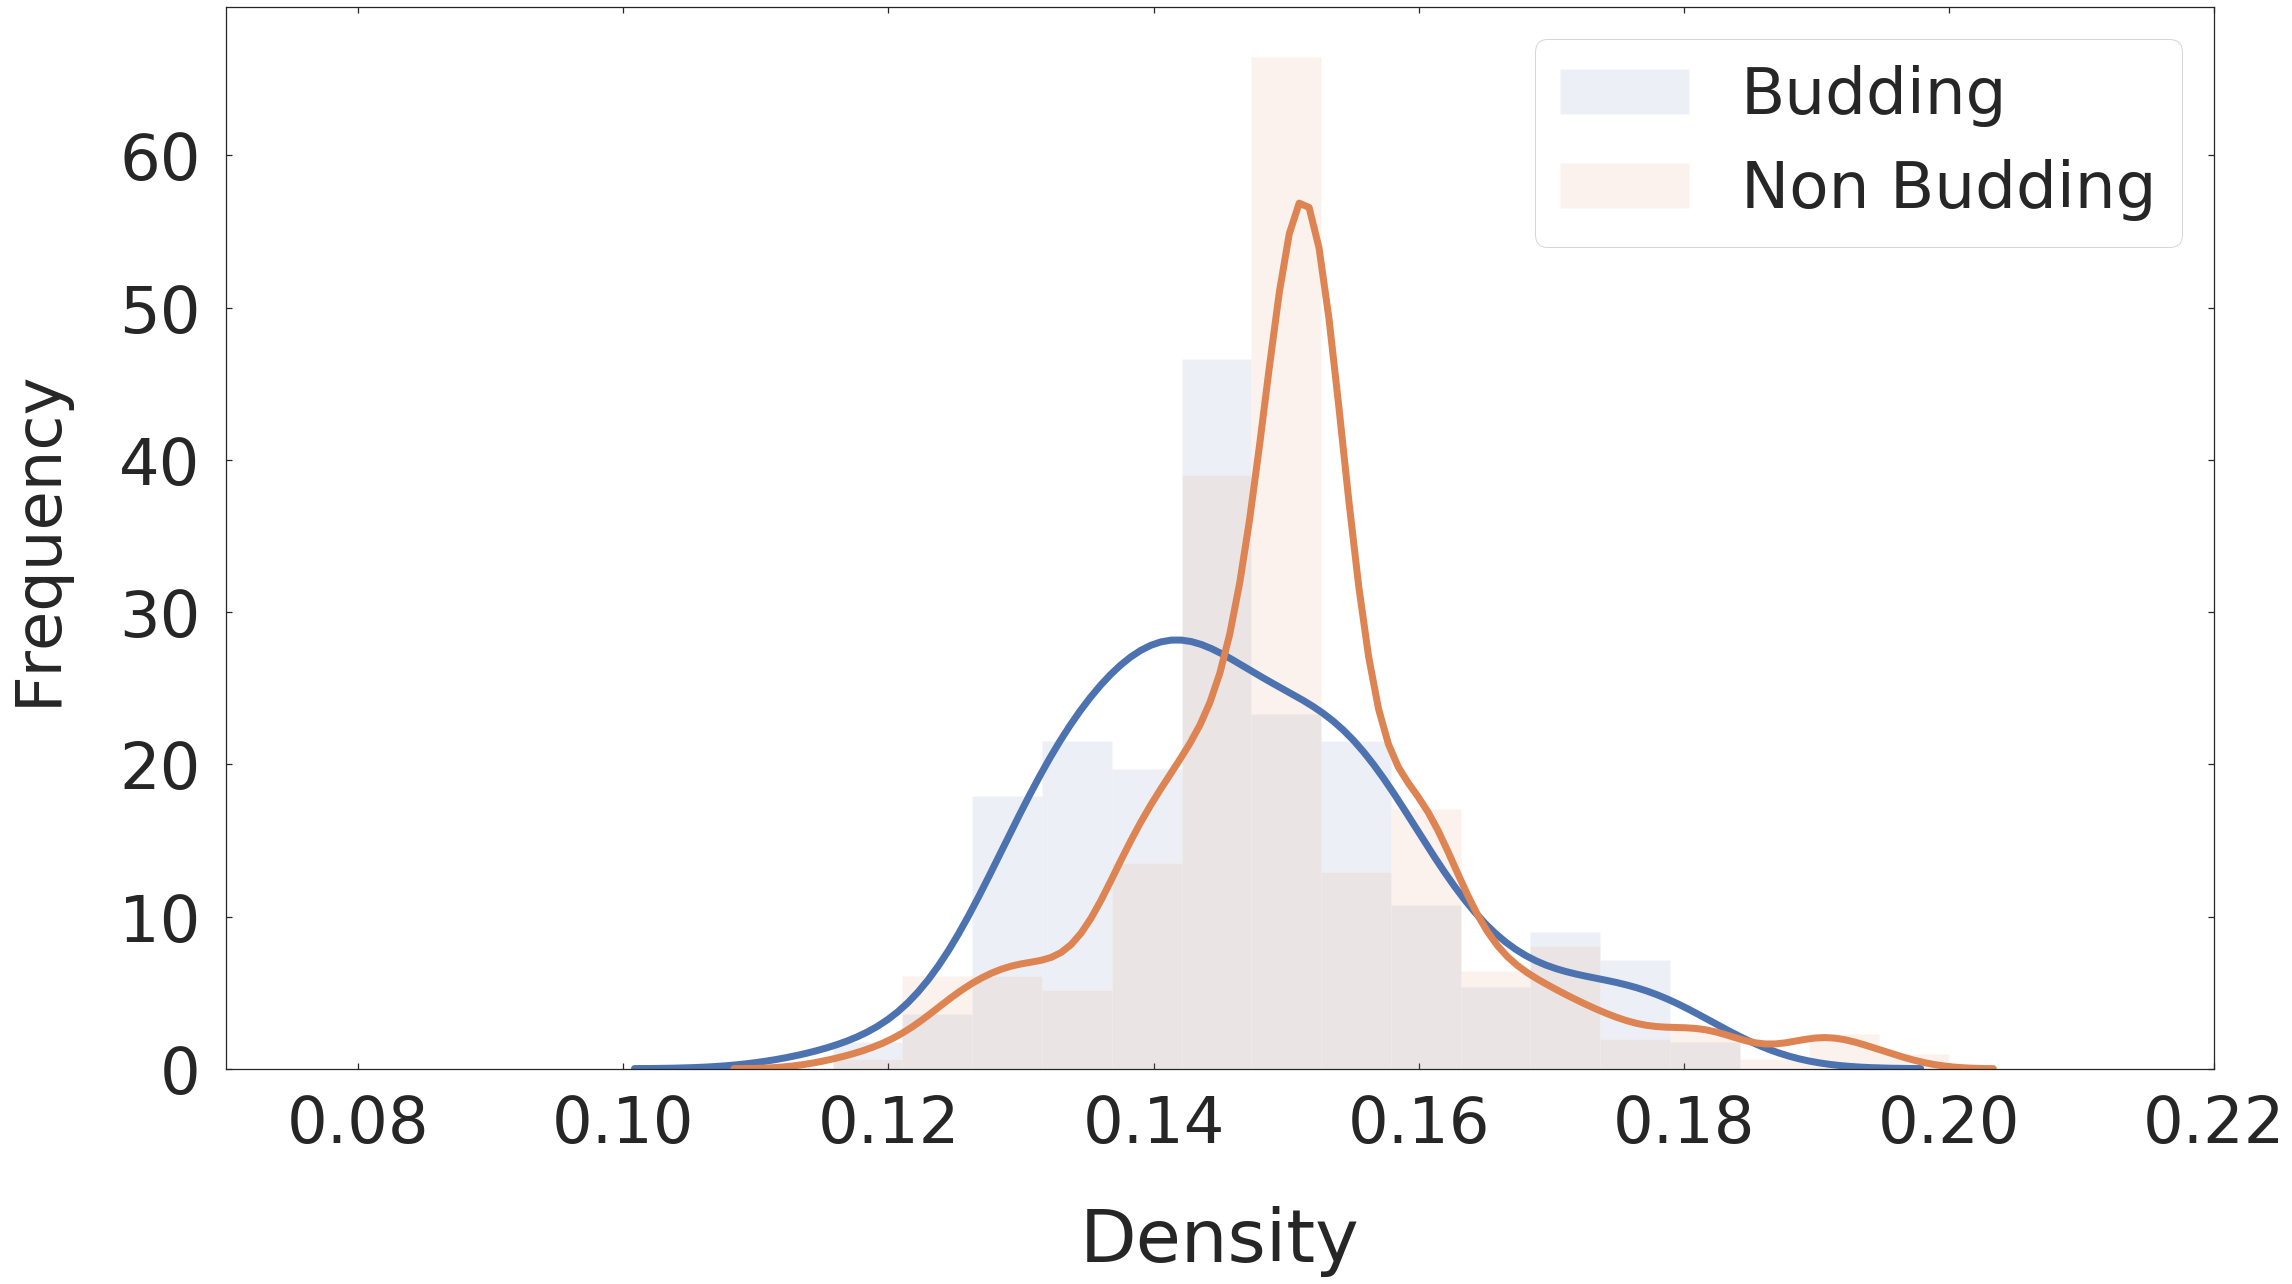

In [47]:
plt.figure(figsize=(16*2.0,9*2.0))

sns.set(rc={"lines.linewidth": 7.0,'text.usetex':False, 'font.family':'sans-serif', 'font.sans-serif':'Helvetica'}, font='DejaVu Sans',style='white')


factor=2.0
padding=0.025

labelSize=32
tickSize=32

ax = plt.subplot(111)

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

lw=6.0

plt.xticks(fontsize=tickSize*factor)
plt.yticks(fontsize=tickSize*factor)
ax.spines["top"].set_visible(True)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(True)    
ax.spines["left"].set_visible(True) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   
    
#     ax.set_yl

plt.tick_params(axis="both", which="both", bottom="on", top="on",    
                    labelbottom="on", left="on", right="on", labelleft="on",direction='in')  

plt.gca().tick_params(axis='x', which='major', pad=25)
plt.gca().tick_params(axis='y', which='major', pad=25)

plt.ylabel("Frequency",fontsize=labelSize*factor,labelpad=25*factor)
plt.xlabel("Density",fontsize=labelSize*factor*1.15,labelpad=25*factor)

bins = np.linspace(0.1, 0.2, 20)

sns.distplot(OldDen,label='Budding',norm_hist=True,kde=True,bins=bins,hist_kws={"alpha":0.1})
sns.distplot(OldFailed,label='Non Budding',norm_hist=True,kde=True,bins=bins,hist_kws={"alpha":0.1})

plt.xlim((0.07, 0.22)) 

plt.legend(loc='best',fontsize=labelSize*1.75*1.15)
plt.tight_layout()

plt.savefig('/Users/joel/Projects/optidb/resubmission/Figures/eps/old-density-longrun.eps', format='eps', dpi=1000)
plt.savefig('/Users/joel/Projects/optidb/resubmission/Figures/png/old-density-longrun.png')
plt.savefig('/Users/joel/Projects/optidb/resubmission/Figures/pdf/old-density-longrun.pdf', format='pdf')
plt.savefig('/Users/joel/Projects/optidb/resubmission/Figures/svg/old-density-longrun.pdf', format='svg')           


plt.show()



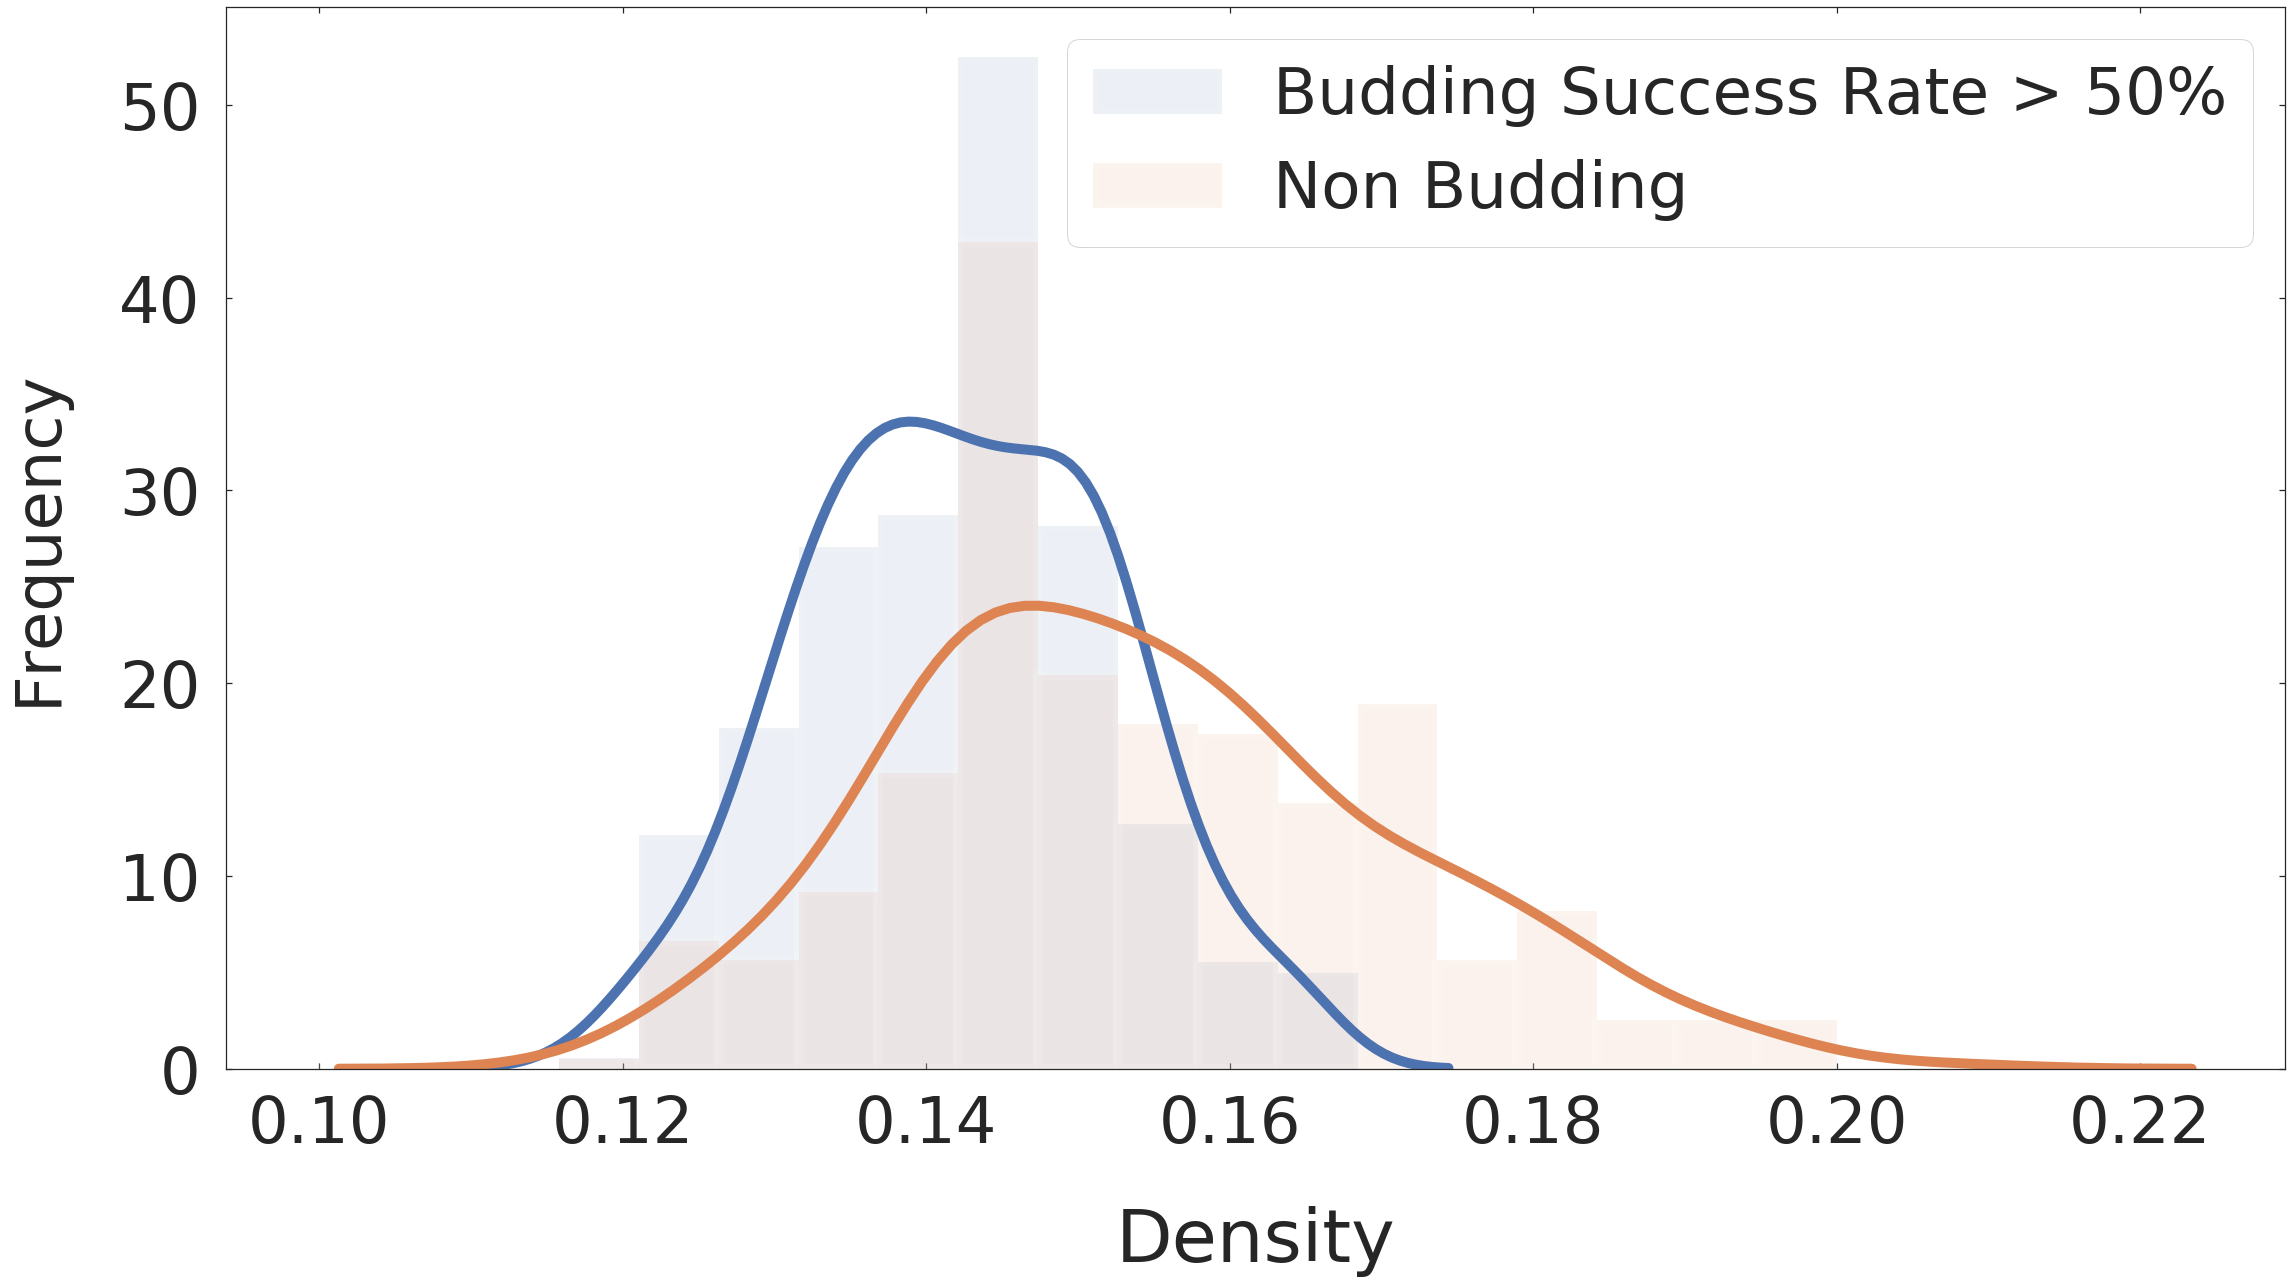

In [81]:
plt.figure(figsize=(16*2.0,9*2.0))

sns.set(rc={'text.usetex':False, 'font.family':'sans-serif', 'font.sans-serif':'Helvetica'}, font='DejaVu Sans',style='white')


factor=2.0
padding=0.025

labelSize=32
tickSize=32

ax = plt.subplot(111)

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

lw=6.0

plt.xticks(fontsize=tickSize*factor)
plt.yticks(fontsize=tickSize*factor)
ax.spines["top"].set_visible(True)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(True)    
ax.spines["left"].set_visible(True) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   
    
#     ax.set_yl

plt.tick_params(axis="both", which="both", bottom="on", top="on",    
                    labelbottom="on", left="on", right="on", labelleft="on",direction='in')  

plt.gca().tick_params(axis='x', which='major', pad=25)
plt.gca().tick_params(axis='y', which='major', pad=25)




# sns.kdeplot(df25['density'],label='0.25',lw=10)
# sns.kdeplot(df50['density'],label='0.5',lw=10)
# sns.kdeplot(df75['density'],label='0.75',lw=10)
# sns.kdeplot(df100['density'],label='1.0',lw=10)
# sns.kdeplot(ndf['density'],label='failed',lw=10)
sns.distplot(df100['density'],label='Budding Success Rate > 50%',norm_hist=True,kde=True,bins=bins,hist_kws={"alpha":0.1,"lw":10},kde_kws={"lw":10})
sns.distplot(ndf['density'],label='Non Budding',norm_hist=True,kde=True,bins=bins,hist_kws={"alpha":0.1,"lw":10},kde_kws={"lw":10})
# sns.distplot(dfu100['density'],label='5%-50%',norm_hist=True,kde=True,bins=bins,hist_kws={"alpha":0.1,"lw":10},kde_kws={"lw":10})

plt.ylabel("Frequency",fontsize=labelSize*factor,labelpad=25*factor)
plt.xlabel("Density",fontsize=labelSize*factor*1.15,labelpad=25*factor)

plt.legend(loc='best',fontsize=labelSize*1.75*1.15)
plt.tight_layout()

plt.savefig('/Users/joel/Projects/optidb/resubmission/Figures/eps/density-longlots-success.eps', format='eps', dpi=1000)
plt.savefig('/Users/joel/Projects/optidb/resubmission/Figures/png/density-longlots-success.png')
plt.savefig('/Users/joel/Projects/optidb/resubmission/Figures/pdf/density-longlots-success.pdf', format='pdf')
plt.savefig('/Users/joel/Projects/optidb/resubmission/Figures/svg/density-longlots-success.pdf', format='svg')           


plt.show()


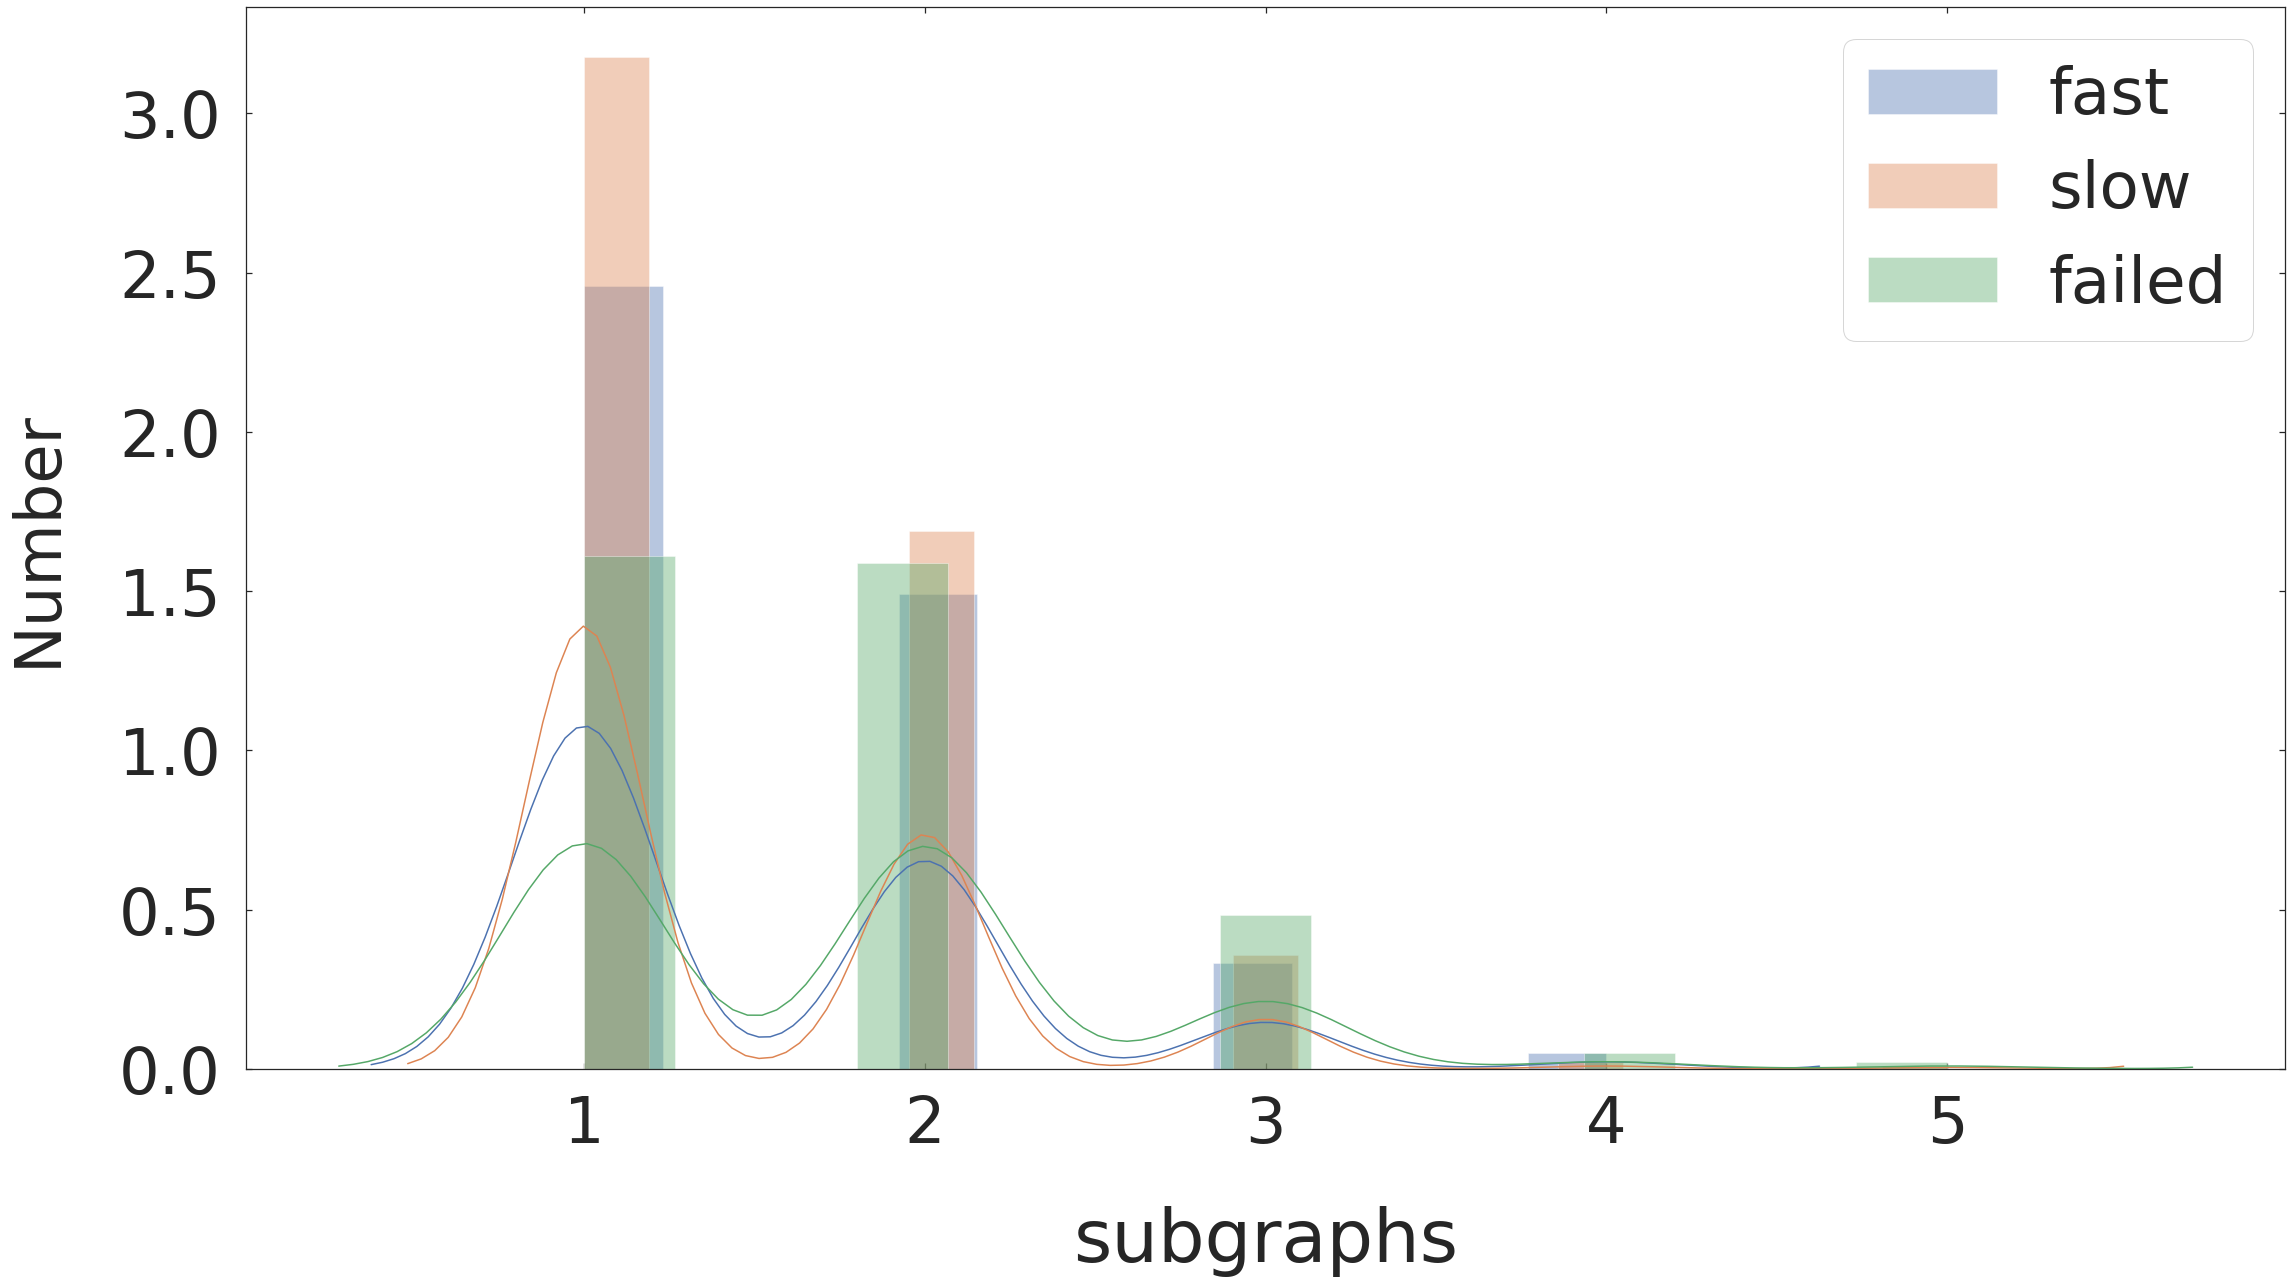

In [49]:
plt.figure(figsize=(16*2.0,9*2.0))

sns.set(rc={'text.usetex':False, 'font.family':'sans-serif', 'font.sans-serif':'Helvetica'}, font='DejaVu Sans',style='white')


factor=2.0
padding=0.025

labelSize=32
tickSize=32

ax = plt.subplot(111)

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

lw=6.0

plt.xticks(fontsize=tickSize*factor)
plt.yticks(fontsize=tickSize*factor)
ax.spines["top"].set_visible(True)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(True)    
ax.spines["left"].set_visible(True) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   
    
#     ax.set_yl

plt.tick_params(axis="both", which="both", bottom="on", top="on",    
                    labelbottom="on", left="on", right="on", labelleft="on",direction='in')  

plt.gca().tick_params(axis='x', which='major', pad=25)
plt.gca().tick_params(axis='y', which='major', pad=25)

plt.ylabel("Number",fontsize=labelSize*factor,labelpad=25*factor)
plt.xlabel("Density",fontsize=labelSize*factor*1.15,labelpad=25*factor)


sns.distplot(fdf['subgraphs'],label='fast')
sns.distplot(sdf['subgraphs'],label='slow')
sns.distplot(ndf['subgraphs'],label='failed')

plt.legend(loc='best',fontsize=labelSize*1.75*1.15)
plt.tight_layout()

plt.savefig('/Users/joel/Projects/optidb/resubmission/Figures/eps/sg-longrun-success.eps', format='eps', dpi=1000)
plt.savefig('/Users/joel/Projects/optidb/resubmission/Figures/png/sg-longrun-success.png')
plt.savefig('/Users/joel/Projects/optidb/resubmission/Figures/pdf/sg-longrun-success.pdf', format='pdf')
plt.savefig('/Users/joel/Projects/optidb/resubmission/Figures/svg/sg-longrun-success.pdf', format='svg')           


plt.show()

In [101]:
df_lp = pd.read_csv('/Users/joel/Desktop/Resubmission/longlots/lotsorots_long.csv')

df_2211 = pd.read_csv('/Users/joel/Desktop/Resubmission/22-11.csv')

In [102]:
lp_fit = []
lp_mfit = []
lp_std = []
normfit_lp = 1.0/np.mean(df_lp[df_lp['generation'] == 0]['fitness'])
for g in df_lp['generation'].unique():
    fits = df_lp[df_lp['generation'] == g]['fitness']
    lp_fit.append(np.mean(fits)*normfit_lp)
    lp_std.append(np.std(fits))
    lp_mfit.append(np.std(fits)*normfit_lp*1.0/np.sqrt(float(len(fits))))

lup = []
ldn = []
for i,l in enumerate(lp_fit):
    lup.append(l+lp_mfit[i])
    ldn.append(l-lp_mfit[i])

In [103]:
old_fit = []
old_mfit = []
old_std = []
normfit_old = 1.0/np.mean(df_2211[df_2211['gen_id'] == 1]['fitness'])
for g in df_2211['gen_id'].unique():
    fits = df_2211[df_2211['gen_id'] == g]['fitness']
    old_fit.append(np.mean(fits)*normfit_lp )
    old_std.append(np.std(fits))
    old_mfit.append(np.std(fits)*normfit_lp *1.0/np.sqrt(float(len(fits))))

oldup = []
olddn = []
for i,l in enumerate(old_fit):
    oldup.append(l+old_mfit[i])
    olddn.append(l-old_mfit[i])

In [104]:
np.mean(lp_std),np.mean(old_std)

(160.72472824120555, 68.47985008611242)

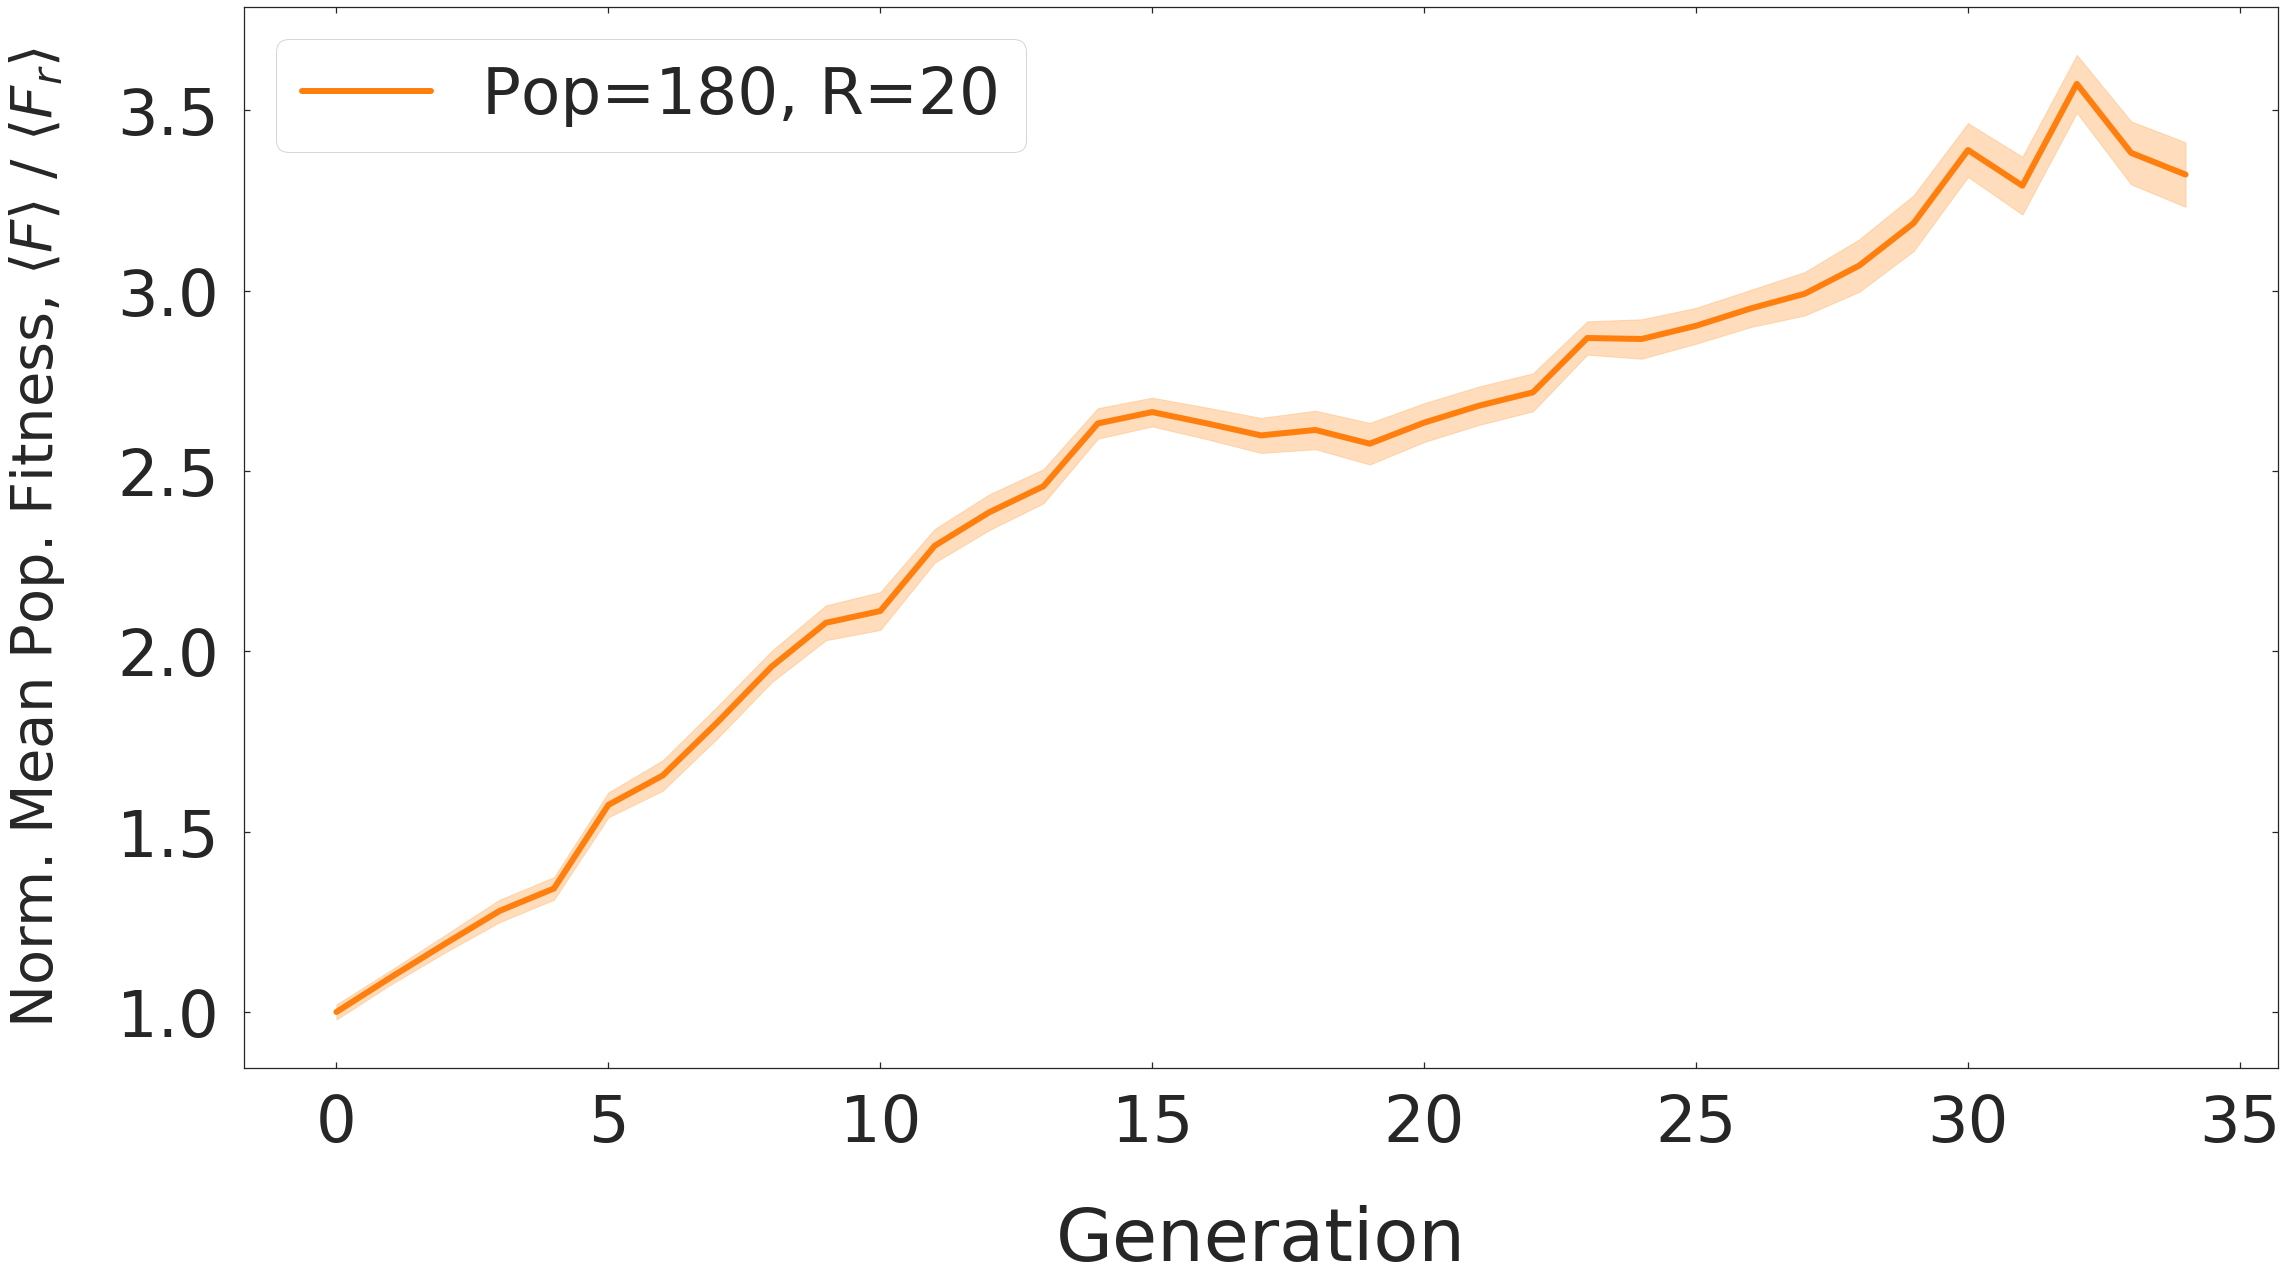

In [107]:
plt.figure(figsize=(16*2.0,9*2.0))

sns.set(rc={'text.usetex':False, 'font.family':'sans-serif', 'font.sans-serif':'Helvetica'}, font='DejaVu Sans',style='white')


factor=2.0
padding=0.025

labelSize=32
tickSize=32

ax = plt.subplot(111)

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

lw=6.0


plt.plot(df_lp['generation'].unique(),lp_fit)

plt.errorbar(df_lp['generation'].unique(),lp_fit,label="Pop=180, R=20",linewidth=lw,color=tab20[2])
ax.fill_between(df_lp['generation'].unique(),lup, ldn,color=tab20[3], interpolate=True,alpha=0.5)

# plt.errorbar(df_lp['generation'].unique(),old_fit,label="Pop 80",linewidth=lw,color=tab20[4])
# ax.fill_between(df_lp['generation'].unique(),oldup, olddn,color=tab20[5], interpolate=True,alpha=0.5)


plt.ylabel(r"Norm. Mean Pop. Fitness, $\left \langle F \right \rangle$ / $\left \langle F_r \right \rangle$",fontsize=labelSize*factor*0.9,labelpad=25*factor)
plt.xlabel("Generation",fontsize=labelSize*factor*1.15,labelpad=25*factor)
    
plt.xticks(fontsize=tickSize*factor)
plt.yticks(fontsize=tickSize*factor)
ax.spines["top"].set_visible(True)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(True)    
ax.spines["left"].set_visible(True) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   
    
#     ax.set_yl

plt.tick_params(axis="both", which="both", bottom="on", top="on",    
                    labelbottom="on", left="on", right="on", labelleft="on",direction='in')  

plt.gca().tick_params(axis='x', which='major', pad=25)
plt.gca().tick_params(axis='y', which='major', pad=25)

# every_nth = 2
# for n, l in enumerate(plt.gca().yaxis.get_ticklabels()):
#     if n % every_nth != 0:
#         l.set_visible(False)
# for n, l in enumerate(plt.gca().xaxis.get_ticklabels()):
#     if n % every_nth != 0:
#         l.set_visible(False)

plt.legend(loc='best',fontsize=labelSize*1.75*1.15)
plt.tight_layout()

plt.savefig('/Users/joel/Projects/optidb/resubmission/Figures/eps/fluctuations2.eps', format='eps', dpi=1000)
plt.savefig('/Users/joel/Projects/optidb/resubmission/Figures/png/fluctuations2.png')
plt.savefig('/Users/joel/Projects/optidb/resubmission/Figures/pdf/fluctuations2.pdf', format='pdf')
plt.savefig('/Users/joel/Projects/optidb/resubmission/Figures/svg/fluctuations2.svg', format='svg')   
    


In [259]:
df_lp = buildNetworksFromSummaries(df_lp)


KeyboardInterrupt: 

In [280]:
df_lp_drop = df_lp.drop_duplicates(subset=['genome'])
df_2211_drop = df_2211.drop_duplicates(subset=['genome'])

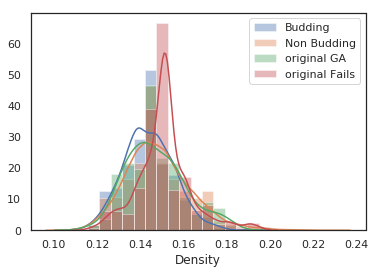

In [279]:
sns.distplot(df_lp_drop[df_lp_drop['budding time']>0.0]['density'],label='Budding',norm_hist=True,kde=True,bins=bins)
sns.distplot(df_lp_drop[df_lp_drop['budding time']<0.0]['density'],label='Non Budding',norm_hist=True,kde=True,bins=bins)
sns.distplot(OldDen,label='original GA',norm_hist=True,kde=True,bins=bins)
sns.distplot(OldFailed,label='original Fails',norm_hist=True,kde=True,bins=bins)
plt.legend()

In [312]:
print np.mean(df_lp_drop[df_lp_drop['budding time']>0.0]['density'])
print np.std(df_lp_drop[df_lp_drop['budding time']>0.0]['density'])/np.sqrt(len(df_lp_drop[df_lp_drop['budding time']>0.0]['density']))

0.143880772005772
0.0002659257977227692


In [313]:
print np.mean(df_lp_drop[df_lp_drop['budding time']<0.0]['density'])
print np.std(df_lp_drop[df_lp_drop['budding time']<0.0]['density'])/np.sqrt(len(df_lp_drop[df_lp_drop['budding time']<0.0]['density']))

0.14829793621739928
0.00022766610701828533


In [314]:
print np.mean(OldDen)
print np.std(OldDen)/np.sqrt(len(OldDen))

0.14698194899056602
0.0012983957010407907


In [315]:
print np.mean(OldFailed)
print np.std(OldFailed)/np.sqrt(len(OldFailed))

0.15094187101528012
0.0005083389155030188


In [281]:
print np.mean(df_lp_drop[df_lp_drop['budding time']>0.0]['budding time'])
print np.mean(df_2211_drop[df_2211_drop['bud_time']>0.0]['bud_time'])

18536.948784722226
18891.045548633538


In [303]:
print np.std(df_lp_drop[df_lp_drop['budding time']>0.0]['budding time'])/np.sqrt(len(df_lp_drop))
print np.std(df_2211_drop[df_2211_drop['bud_time']>0.0]['bud_time'])/np.sqrt(len(df_2211_drop))

47.19537556439721
121.42442527489774


In [288]:
print np.median(df_lp_drop[df_lp_drop['budding time']>0.0]['budding rate'])
print np.median(df_2211_drop[df_2211_drop['bud_time']>0.0]['budding_rate'])

0.25
0.25
